In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def calc_stuff(bs, input_shape, dims_to_mix):
    n_w = np.sum([i*(i+1) for i in [input_shape[dim] for dim in dims_to_mix]])
    
    bsis = [bs]+input_shape
    n_act = (1+2*len(dims_to_mix))*np.prod(bsis)
    
    forward_size = (n_act+n_w)*4/1e6
    return {'bs': bs, 'n_w': n_w, 'forward_size': forward_size}

bs = 7
print(calc_stuff(bs, [65536]*1, np.arange(1)))
print(calc_stuff(bs, [256]*2, np.arange(2)))
print(calc_stuff(bs, [16]*4, np.arange(4)))
print(calc_stuff(bs, [4]*8, np.arange(8)))
print(calc_stuff(bs, [2]*16, np.arange(16)))

{'bs': 7, 'n_w': 4295032832, 'forward_size': 17185.636352}
{'bs': 7, 'n_w': 131584, 'forward_size': 9.701376}
{'bs': 7, 'n_w': 1088, 'forward_size': 16.519424}
{'bs': 7, 'n_w': 160, 'forward_size': 31.195776}
{'bs': 7, 'n_w': 96, 'forward_size': 60.555648}


(0.0, 20.0)

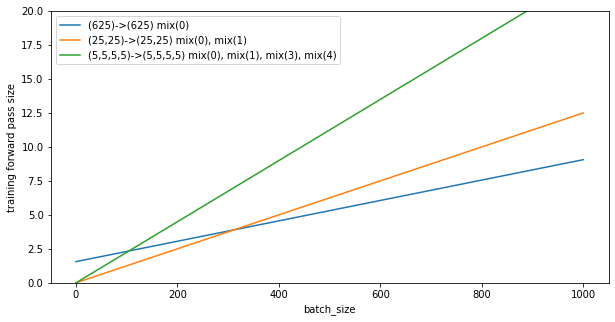

In [50]:
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')
bss = np.linspace(0, 1000, 1000)
plt.plot(bss, [calc_stuff(bs, [625]*1, np.arange(1))['forward_size'] for bs in bss],
         label='(625)->(625) mix(0)')
plt.plot(bss, [calc_stuff(bs, [25]*2, np.arange(2))['forward_size'] for bs in bss],
         label='(25,25)->(25,25) mix(0), mix(1)')
plt.plot(bss, [calc_stuff(bs, [5]*4, np.arange(4))['forward_size'] for bs in bss],
         label='(5,5,5,5)->(5,5,5,5) mix(0), mix(1), mix(3), mix(4)')
# plt.plot(bss, [calc_stuff(bs, [4]*8, np.arange(8))['forward_size'] for bs in bss])
# plt.plot(bss, [calc_stuff(bs, [2]*16, np.arange(16))['forward_size'] for bs in bss])
plt.legend()
plt.xlabel('batch_size')
plt.ylabel('training forward pass size')
plt.ylim(0, 20)
# plt.yscale('log')
# plt.xscale('log')

(0.0, 2000.0)

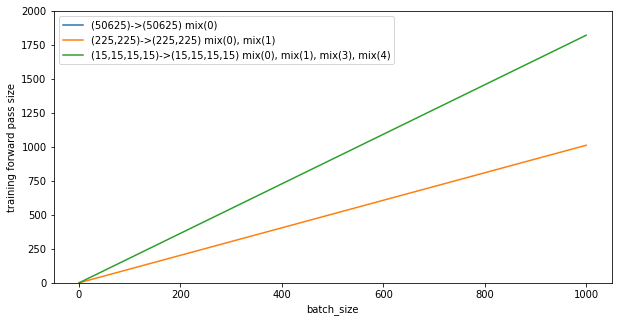

In [51]:
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')
bss = np.linspace(0, 1000, 1000)
plt.plot(bss, [calc_stuff(bs, [50625]*1, np.arange(1))['forward_size'] for bs in bss],
         label='(50625)->(50625) mix(0)')
plt.plot(bss, [calc_stuff(bs, [225]*2, np.arange(2))['forward_size'] for bs in bss],
         label='(225,225)->(225,225) mix(0), mix(1)')
plt.plot(bss, [calc_stuff(bs, [15]*4, np.arange(4))['forward_size'] for bs in bss],
         label='(15,15,15,15)->(15,15,15,15) mix(0), mix(1), mix(3), mix(4)')
# plt.plot(bss, [calc_stuff(bs, [4]*8, np.arange(8))['forward_size'] for bs in bss])
# plt.plot(bss, [calc_stuff(bs, [2]*16, np.arange(16))['forward_size'] for bs in bss])
plt.legend()
plt.xlabel('batch_size')
plt.ylabel('training forward pass size')
plt.ylim(0, 2000)
# plt.yscale('log')
# plt.xscale('log')

In [29]:
import torch

In [349]:
net = mlp_shaker_flat.MLPFlatShaker([625], [0], expansion_factor=1, normalize=False, residual=False)
print(util.count_params(net))
print(summary(net, input_size=[bs, 625]))
net = mlp_shaker_flat.MLPFlatShaker([25, 25], [0, 1], expansion_factor=1, normalize=False, residual=False)
print(util.count_params(net))
print(summary(net, input_size=[bs, 625]))
net = mlp_shaker_flat.MLPFlatShaker([5, 5, 5, 5], [0, 1, 2, 3], expansion_factor=1, normalize=False, residual=False)
print(util.count_params(net))
print(summary(net, input_size=[bs, 625]))

391250
printing lengths of tensors now
5625
5625
Layer (type:depth-idx)                   Output Shape              Param #
MLPFlatShaker                            --                        --
├─ModuleList: 1-1                        --                        --
│    └─PreNormResidual: 2-1              [9, 625]                  --
│    │    └─Sequential: 3-1              [9, 625]                  391,250
Total params: 391,250
Trainable params: 391,250
Non-trainable params: 0
Total mult-adds (M): 3.52
Input size (MB): 0.02
Forward/backward pass size (MB): 0.04
Params size (MB): 1.56
Estimated Total Size (MB): 1.63
1300
printing lengths of tensors now
5625
5625
Layer (type:depth-idx)                   Output Shape              Param #
MLPFlatShaker                            --                        --
├─ModuleList: 1-1                        --                        --
│    └─PreNormResidual: 2-1              [9, 25, 25]               --
│    │    └─Sequential: 3-1              [9, 2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [3]:
# bs_train, bs_test = 64, 128
bs_train, bs_test = 512, 1024
work_dir = os.environ['WORK']
transform = transforms.Compose([
#     transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

ds_train = torchvision.datasets.CIFAR10(f'{work_dir}/datasets/cifar10', train=True, transform=transform)
ds_test = torchvision.datasets.CIFAR10(f'{work_dir}/datasets/cifar10', train=False, transform=transform)
# ds_train = torchvision.datasets.ImageNet(f'{work_dir}/datasets/imagenet', split='train', transform=transform)
dl_train = DataLoader(ds_train, batch_size=bs_train, shuffle=True, num_workers=16)
dl_test = DataLoader(ds_test, batch_size=bs_test, shuffle=True, num_workers=16)
n_classes = len(ds_train.classes)
bs, c, h, w = input_shape = next(iter(dl_train))[0].shape

In [4]:
import wandb
from functools import partial

In [5]:
# wandb.init();

In [6]:
import mlp_mixer_pytorch, mlp_shaker_flat
import train_simple


In [17]:
net = mlp_mixer_pytorch.MLPMixer(image_size=32, channels=3, patch_size=4, 
                                 dim=4*4*3, depth=1, num_classes=n_classes,
                                 expansion_factor=4, dropout=0.0)
# net = mlp_shaker_flat.ViMixer(image_size=32, channels=3, patch_size=4, 
#                               dim=4*4*3, depth=15, num_classes=n_classes, 
#                               expansion_factor=4.0, dropout=0.0)

# net = mlp_shaker_flat.ViShaker(image_size=32, channels=3, patch_size=4, 
#                               dim=4*4*3, depth=15, num_classes=n_classes, 
#                               expansion_factor=4.0, dropout=0.0)
# evaluate_model(net, dl=dl_test, verbose=True, device=device)
train_simple.train_net(net, dl=dl_train, dl_test=dl_test, n_epochs=1, device=device, tqdm=partial(tqdm, leave=False));
# evaluate_model(net, dl=dl_test, verbose=True, device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Average Loss: 2.400, Accuracy: 0.064%


  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Average Loss: 1.586, Accuracy: 0.421%


In [18]:
net = mlp_mixer_pytorch.MLPMixer(image_size=32, channels=3, patch_size=4, 
                                 dim=4*4*3, depth=32, num_classes=n_classes,
                                 expansion_factor=4, dropout=0.0)
# net = mlp_shaker_flat.ViMixer(image_size=32, channels=3, patch_size=4, 
#                               dim=4*4*3, depth=15, num_classes=n_classes, 
#                               expansion_factor=4.0, dropout=0.0)

# net = mlp_shaker_flat.ViShaker(image_size=32, channels=3, patch_size=4, 
#                               dim=4*4*3, depth=32, num_classes=n_classes, 
#                               expansion_factor=4.0, dropout=0.0)
# evaluate_model(net, dl=dl_test, verbose=True, device=device)
train_simple.train_net(net, dl=dl_train, dl_test=dl_test, n_epochs=1, device=device, tqdm=partial(tqdm, leave=False));
# evaluate_model(net, dl=dl_test, verbose=True, device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Average Loss: 2.319, Accuracy: 0.115%


  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Average Loss: 1.593, Accuracy: 0.417%


In [37]:
bs_train, bs_test = 512, 1024
transform = transforms.Compose([
#     transforms.Resize((224, 224)),
    transforms.ToTensor(),
#     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

ds_train = torchvision.datasets.CIFAR10(f'~/datasets/cifar10', train=True, transform=transform)
ds_test = torchvision.datasets.CIFAR10(f'~/datasets/cifar10', train=False, transform=transform)
# ds_train = torchvision.datasets.ImageNet(f'{work_dir}/datasets/imagenet', split='train', transform=transform)
dl_train = DataLoader(ds_train, batch_size=bs_train, shuffle=True, num_workers=16)
dl_test = DataLoader(ds_test, batch_size=bs_test, shuffle=True, num_workers=16)
n_classes = len(ds_train.classes)
bs, c, h, w = input_shape = next(iter(dl_train))[0].shape

In [55]:
xs = []
ys = []
for x, y in dl_test:
    xs.append(x)
    ys.append(y)
xs = torch.cat(xs)
ys = torch.cat(ys)

In [56]:
xs.shape, ys.shape

(torch.Size([10000, 3, 32, 32]), torch.Size([10000]))

In [57]:
for yi in torch.unique(ys):
    for i, xi in enumerate(tqdm(xs[ys==yi])):
        img = xi.permute(1, 2, 0).cpu().numpy()
        plt.imsave(f'/home1/08258/akumar01/datasets/manual_cifar10/val/class_{yi.item()}/img_{i}.png', img)
    

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [14]:
net = mlp_mixer_pytorch.MLPMixer(image_size=32, channels=3, patch_size=4, 
                                 dim=4*4*3, depth=15, num_classes=n_classes,
                                 expansion_factor=4, dropout=0.0)
net = mlp_shaker_flat.ViShaker(image_size=32, channels=3, patch_size=4, 
                              dim=4*4*3, depth=15, num_classes=n_classes, 
                              expansion_factor=4.0, dropout=0.0)
net = mlp_shaker_flat.ViMixer(image_size=32, channels=3, patch_size=4, 
                              dim=4*4*3, depth=15, num_classes=n_classes, 
                              expansion_factor=4.0, dropout=0.0)

# evaluate_model(net, dl=dl_test, verbose=True, device=device)
train_simple.train_net(net, dl=dl_train, dl_test=dl_test, n_epochs=10, device=device, tqdm=partial(tqdm, leave=False));
# evaluate_model(net, dl=dl_test, verbose=True, device=device)

ValueError: You must call `wandb.init` before calling watch

In [77]:
wandb.init()

In [78]:
wandb.config.lr='fijfew'
wandb.config.feiwafew='fwa'

In [91]:
wandb.config.as_dict()

{'lr': 'fijfew', 'feiwafew': 'fwa'}

In [97]:
net = net.cpu()
torch.save(net.cpu().state_dict(), 'data/whatup.pth')


In [18]:
import mlp_shaker_flat
import mlp_mixer_pytorch
import torchinfo

In [21]:
net = mlp_mixer_pytorch.MLPMixer(image_size=224, channels=3, patch_size=16, 
                                 dim=16*16*3, depth=3, num_classes=n_classes, 
                                 expansion_factor=4.0, dropout=0.2)
print(util.count_params(net))

net = mlp_shaker_flat.ViMixer(image_size=224, channels=3, patch_size=16, 
                              dim=16*16*3, depth=3, num_classes=n_classes, 
                              expansion_factor=4.0, dropout=0.2)
print(util.count_params(net))
net = mlp_shaker_flat.ViShaker(image_size=224, channels=3, patch_size=16, 
                              dim=16*16*3, depth=3, num_classes=n_classes, 
                              expansion_factor=4.0, dropout=0.2)
print(util.count_params(net))

15701254
15701254
622765


In [46]:
net = mlp_shaker_flat.ViShaker(image_size=224, channels=3, patch_size=16, 
                              dim=16*16*3, depth=3, num_classes=n_classes, 
                              expansion_factor=4.0, dropout=0.2)
net = net.cuda(1)
summary(net, input_size=input_shape, device='cuda:1')

Layer (type:depth-idx)                        Output Shape              Param #
Sequential                                    --                        --
├─MLPFlatShaker: 1                            --                        --
│    └─ModuleList: 2-1                        --                        --
├─Rearrange: 1-1                              [64, 14, 14, 768]         --
├─Linear: 1-2                                 [64, 14, 14, 768]         590,592
├─Rearrange: 1-3                              [64, 14, 14, 16, 16, 3]   --
├─MLPFlatShaker: 1-4                          [64, 14, 14, 16, 16, 3]   --
│    └─ModuleList: 2-1                        --                        --
│    │    └─PreNormResidual: 3-1              [64, 14, 14, 16, 16, 3]   1,644
│    │    └─PreNormResidual: 3-2              [64, 14, 14, 16, 16, 3]   1,644
│    │    └─PreNormResidual: 3-3              [64, 14, 14, 16, 16, 3]   2,134
│    │    └─PreNormResidual: 3-4              [64, 14, 14, 16, 16, 3]   2,134
│  

In [9]:
util.count_params(net)

623053

In [23]:
evaluate_net(net, dl=dl_test, tqdm=tqdm, device='cuda', verbose=True)
losses_train, losses_test = train_net(net, dl=dl_train, dl_test=dl_test, n_epochs=10, device='cuda', lr=1e-2, tqdm=tqdm)
evaluate_net(net, dl=dl_test, tqdm=tqdm, device='cuda', verbose=True)

  0%|          | 0/79 [00:00<?, ?it/s]

Average Loss: 2.330, Accuracy: 12.710%


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [14]:
net = mlp_mixer_pytorch.MLPMixer(image_size=32, channels=3, patch_size=4, dim=48, depth=10, num_classes=10, expansion_factor=4, dropout=0.0)
print(util.count_params(net))
net = mlp_shaker_flat.ViMixer(image_size=32, channels=3, patch_size=4, dim=48, depth=10, num_classes=10, expansion_factor=4, dropout=0.0)
print(util.count_params(net))
net = mlp_shaker_flat.ViShaker(image_size=32, channels=3, patch_size=4, dim=48, depth=10, num_classes=10, expansion_factor=4, dropout=0.0)
print(util.count_params(net))
net = mlp_shaker_flat.ViShaker(image_size=32, channels=3, patch_size=4, dim=48, depth=20, num_classes=10, expansion_factor=4, dropout=0.0)
print(util.count_params(net))
net = mlp_shaker_flat.ViShaker(image_size=32, channels=3, patch_size=4, dim=48, depth=40, num_classes=10, expansion_factor=4, dropout=0.0)
print(util.count_params(net))

522458
522778
18348
33758
64578


In [25]:
net = mlp_mixer_pytorch.MLPMixer(image_size=32, channels=3, patch_size=4, dim=48, depth=10, num_classes=10, expansion_factor=4, dropout=0.0)
net(torch.randn(100, 3, 32, 32)).shape

evaluate_model(net, dl=dl_test, verbose=True, device=device)
train_classification_model(net, dl=dl_train, n_epochs=5, device=device)
evaluate_model(net, dl=dl_test, verbose=True, device=device)

Average Loss: 2.304, Accuracy: 11.510%


Average Loss: 1.408, Accuracy: 49.390%


Average Loss: 1.254, Accuracy: 55.010%


Average Loss: 1.166, Accuracy: 58.380%


Average Loss: 1.098, Accuracy: 61.200%


Average Loss: 1.048, Accuracy: 62.950%



Average Loss: 1.048, Accuracy: 62.950%


{'loss': 1.0482080638408662, 'accuracy': 62.949999999999996}

In [27]:
net = mlp_shaker_flat.ViMixer(image_size=32, channels=3, patch_size=4, dim=48, depth=10, num_classes=10, expansion_factor=4, dropout=0.0)
net(torch.randn(100, 3, 32, 32)).shape

evaluate_model(net, dl=dl_test, verbose=True, device=device)
train_classification_model(net, dl=dl_train, n_epochs=5, device=device)
evaluate_model(net, dl=dl_test, verbose=True, device=device)

Average Loss: 2.376, Accuracy: 7.420%


Average Loss: 1.432, Accuracy: 48.200%


Average Loss: 1.282, Accuracy: 53.880%


Average Loss: 1.193, Accuracy: 57.780%


Average Loss: 1.184, Accuracy: 57.780%


Average Loss: 1.114, Accuracy: 60.710%



Average Loss: 1.114, Accuracy: 60.710%


{'loss': 1.1138983130455018, 'accuracy': 60.709999999999994}

In [6]:
net = mlp_shaker_flat.ViShaker(image_size=32, channels=3, patch_size=4, dim=48, depth=10, num_classes=10, expansion_factor=4, dropout=0.0)
net(torch.randn(100, 3, 32, 32)).shape

evaluate_model(net, dl=dl_test, verbose=True, device=device)
train_classification_model(net, dl=dl_train, n_epochs=5, device=device)
evaluate_model(net, dl=dl_test, verbose=True, device=device)

Average Loss: 2.389, Accuracy: 9.700%


Average Loss: 1.906, Accuracy: 29.660%


Average Loss: 1.754, Accuracy: 34.440%


Average Loss: 1.679, Accuracy: 38.330%


Average Loss: 1.611, Accuracy: 40.790%


Average Loss: 1.554, Accuracy: 42.910%



Average Loss: 1.554, Accuracy: 42.910%


{'loss': 1.553963267803192, 'accuracy': 42.91}

In [6]:
net = mlp_shaker_flat.ViShaker(image_size=32, channels=3, patch_size=4, dim=48, depth=20, num_classes=10, expansion_factor=4, dropout=0.0)
net(torch.randn(100, 3, 32, 32)).shape

evaluate_model(net, dl=dl_test, verbose=True, device=device)
train_classification_model(net, dl=dl_train, n_epochs=5, device=device)
evaluate_model(net, dl=dl_test, verbose=True, device=device)

Average Loss: 2.387, Accuracy: 8.720%


Average Loss: 1.823, Accuracy: 33.660%


Average Loss: 1.682, Accuracy: 38.650%


Average Loss: 1.599, Accuracy: 41.690%


Average Loss: 1.570, Accuracy: 42.270%


RuntimeError: CUDA error: an illegal memory access was encountered

In [6]:
net = mlp_shaker_flat.ViShaker(image_size=32, channels=3, patch_size=4, dim=48, depth=40, num_classes=10, expansion_factor=4, dropout=0.0)
net(torch.randn(100, 3, 32, 32)).shape

evaluate_model(net, dl=dl_test, verbose=True, device=device)
train_classification_model(net, dl=dl_train, n_epochs=5, device=device)
evaluate_model(net, dl=dl_test, verbose=True, device=device)

Average Loss: 2.389, Accuracy: 9.120%


Average Loss: 1.755, Accuracy: 36.150%


Average Loss: 1.715, Accuracy: 37.880%


Average Loss: 1.562, Accuracy: 42.890%


Average Loss: 1.524, Accuracy: 44.320%


Average Loss: 1.475, Accuracy: 46.010%



Average Loss: 1.475, Accuracy: 46.010%


{'loss': 1.4746923822164535, 'accuracy': 46.01}

In [6]:
net = mlp_shaker_flat.ViShaker([8, 8, 4, 4, 3], [0, 1, 2, 3, 4]*30, 
                               global_avg_pool_str='b i j k l m-> b k l m')
# net = mlp_shaker_flat.ViShaker([64, 48], [0, 1]*16, 
#                                global_avg_pool_str='b i j -> b j')
torchinfo.summary(net, input_size=(bs_train, 3, 32, 32), device='cuda')

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [Rearrange: 1, MLPFlatShaker: 1, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4, PreNormResidual: 3, DimLayerNorm: 4, Sequential: 4]

# My MLP SHAKER implementation:

In [7]:
evaluate_model(net, dl_test, device='cuda', verbose=True)
train_classification_model(net, dl_train, n_epochs=30, device='cuda')
evaluate_model(net, dl_test, device='cuda', verbose=True)

Average Loss: 3.115, Accuracy: 11.480%


Average Loss: 2.136, Accuracy: 19.140%


Average Loss: 1.991, Accuracy: 24.700%


Average Loss: 1.891, Accuracy: 27.290%


Average Loss: 1.830, Accuracy: 29.990%


Average Loss: 1.771, Accuracy: 32.200%


Average Loss: 1.743, Accuracy: 32.980%


Average Loss: 1.728, Accuracy: 34.460%


Average Loss: 1.702, Accuracy: 35.570%


RuntimeError: CUDA error: an illegal memory access was encountered

# My MLP mixer implementation:

In [37]:
evaluate_model(net, dl_test, device='cuda', verbose=True)
train_classification_model(net, dl_train, n_epochs=30, device='cuda')
evaluate_model(net, dl_test, device='cuda', verbose=True)

Average Loss: 2.332, Accuracy: 12.790%


Average Loss: 1.495, Accuracy: 45.060%


Average Loss: 1.327, Accuracy: 52.160%


Average Loss: 1.228, Accuracy: 55.280%


Average Loss: 1.182, Accuracy: 56.240%


Average Loss: 1.144, Accuracy: 58.880%


Average Loss: 1.172, Accuracy: 58.430%


Average Loss: 1.158, Accuracy: 59.030%


Average Loss: 1.201, Accuracy: 58.810%


Exception ignored in: <generator object tqdm.__iter__ at 0x7f14e0699350>
Traceback (most recent call last):
  File "/home/akarshkumar0101/.local/lib/python3.7/site-packages/tqdm/std.py", line 1183, in __iter__
    self.close()
  File "/home/akarshkumar0101/.local/lib/python3.7/site-packages/tqdm/notebook.py", line 251, in close
    super(tqdm_notebook, self).close(*args, **kwargs)
  File "/home/akarshkumar0101/.local/lib/python3.7/site-packages/tqdm/std.py", line 1271, in close
    self._decr_instances(self)
  File "/home/akarshkumar0101/.local/lib/python3.7/site-packages/tqdm/std.py", line 572, in _decr_instances
    cls.monitor.exit()
  File "/home/akarshkumar0101/.local/lib/python3.7/site-packages/tqdm/_monitor.py", line 53, in exit
    self.join()
  File "/usr/lib/python3.7/threading.py", line 1044, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.7/threading.py", line 1060, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt: 


RuntimeError: CUDA error: an illegal memory access was encountered

# other MLP mixer implementation:

In [31]:
evaluate_model(net, dl_test, device='cuda', verbose=True)
train_classification_model(net, dl_train, n_epochs=30, device='cuda')
evaluate_model(net, dl_test, device='cuda', verbose=True)

Average Loss: 2.321, Accuracy: 10.670%


Average Loss: 1.558, Accuracy: 43.110%


Average Loss: 1.394, Accuracy: 49.060%


Average Loss: 1.285, Accuracy: 54.020%


Average Loss: 1.238, Accuracy: 55.350%


Average Loss: 1.204, Accuracy: 56.900%


Average Loss: 1.168, Accuracy: 58.750%


Average Loss: 1.136, Accuracy: 59.740%


Average Loss: 1.121, Accuracy: 60.520%


Average Loss: 1.134, Accuracy: 60.240%


Average Loss: 1.125, Accuracy: 60.510%


Average Loss: 1.145, Accuracy: 60.970%


Average Loss: 1.182, Accuracy: 60.740%


Average Loss: 1.172, Accuracy: 61.200%


Average Loss: 1.218, Accuracy: 60.010%


Average Loss: 1.285, Accuracy: 59.700%


Exception ignored in: <generator object tqdm.__iter__ at 0x7f148dcbaed0>
Traceback (most recent call last):
  File "/home/akarshkumar0101/.local/lib/python3.7/site-packages/tqdm/std.py", line 1183, in __iter__
    self.close()
  File "/home/akarshkumar0101/.local/lib/python3.7/site-packages/tqdm/notebook.py", line 251, in close
    super(tqdm_notebook, self).close(*args, **kwargs)
  File "/home/akarshkumar0101/.local/lib/python3.7/site-packages/tqdm/std.py", line 1271, in close
    self._decr_instances(self)
  File "/home/akarshkumar0101/.local/lib/python3.7/site-packages/tqdm/std.py", line 572, in _decr_instances
    cls.monitor.exit()
  File "/home/akarshkumar0101/.local/lib/python3.7/site-packages/tqdm/_monitor.py", line 53, in exit
    self.join()
  File "/usr/lib/python3.7/threading.py", line 1044, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.7/threading.py", line 1060, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [12]:
evaluate_model(net, dl_train, device='cuda', verbose=True)

Average Loss: 1.533, Accuracy: 43.722%


{'loss': 1.5325301897525787, 'accuracy': 43.722}

# TODO:

to figure out why MLP-shaker isn't generalizing at it gets more dimensions,
we need to figure out why MLP-shaker does nto perform as well as MLP-mixer.

this is the same as figuring out why MLP-mixing does not perform as well as FC network.

to do this, we can create high dimensional linear mapping X -> M -> Y.
we can then fit to it a 
- linear model
- mlp mixer
- mlp shaker,
- ...

and see performance drop
however we can also change the number of blocks in mlp mixer and mlp shaker and hopefully that will generalize better


In [29]:
import mlp_mixer_pytorch

In [30]:
net = mlp_mixer_pytorch.MLPMixer(image_size=32, channels=3, 
                                 patch_size=8, dim=48, depth=10, 
                                 num_classes=10)


torchinfo.summary(net, input_size=(99, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               --                        --
├─Rearrange: 1-1                         [99, 16, 192]             --
├─Linear: 1-2                            [99, 16, 48]              9,264
├─Sequential: 1-3                        [99, 16, 48]              --
│    └─PreNormResidual: 2-1              [99, 16, 48]              --
│    │    └─LayerNorm: 3-1               [99, 16, 48]              96
│    │    └─Sequential: 3-2              [99, 16, 48]              2,128
│    └─PreNormResidual: 2-2              [99, 16, 48]              --
│    │    └─LayerNorm: 3-3               [99, 16, 48]              96
│    │    └─Sequential: 3-4              [99, 16, 48]              18,672
├─Sequential: 1-4                        [99, 16, 48]              --
│    └─PreNormResidual: 2-3              [99, 16, 48]              --
│    │    └─LayerNorm: 3-5               [99, 16, 48]              96
│    

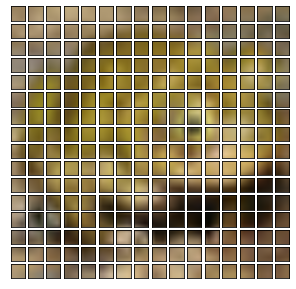

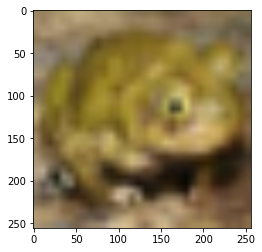

frog


In [107]:
def show_picture(X_batch, X_batch_patch, Y_batch, i=0):
    plt.figure(figsize=(5,5))
    for pi1 in range(16):
        for pi2 in range(16):
            plt.subplot(16, 16, pi1*16+pi2+1)
            plt.imshow(X_batch_patch[i, pi1, pi2].numpy())
            plt.xticks([]);plt.yticks([])
    plt.show()
    plt.imshow(X_batch[i].permute(1, 2, 0).numpy())
    plt.show()
    print(labels[Y_batch[i]])
    
show_picture(X_batch, X_batch_patch, Y_batch, 7)

In [193]:
net = mlp_shaker_flat.ViShaker([64, 48], [0, 1]*50, 
                               global_avg_pool_str='b i j -> b j', residual=True, normalize=True)


X = torch.randn(10, 3, 32, 32)
Y = torch.randint(high=10, size=(10,))

loss_fn = nn.NLLLoss()
opt = torch.optim.Adam(net.parameters())

opt.zero_grad()
Yp = net(X)
loss = loss_fn(Yp, Y)
loss.backward()


In [194]:
# torchinfo.summary(net)

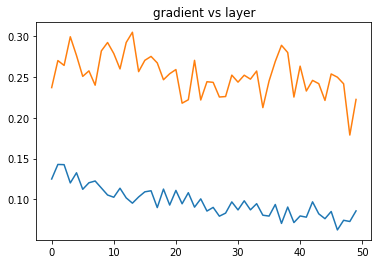

In [195]:
# grad_max = [p.grad.abs().max().item() for p in net.parameters()]
# grad_min = [p.grad.abs().min().item() for p in net.parameters()]
# grad_mean = [p.grad.abs().mean().item() for p in net.parameters()]


# grad_max = [net.shaker.mix_dims[i].fn[0].weight.grad.norm().max().item() for i in range(20)]
# grad_min = [net.shaker.mix_dims[i].fn[0].weight.grad.norm().min().item() for i in range(20)]
# grad_mean = [net.shaker.mix_dims[i].fn[0].weight.grad.norm().mean().item() for i in range(20)]

grad_norm = [net.shaker.mix_dims[i].fn[3].weight.grad.flatten().norm().item() for i in range(0, 100,2)]
plt.plot(grad_norm)
grad_norm = [net.shaker.mix_dims[i].fn[3].weight.grad.flatten().norm().item() for i in range(1, 100,2)]
plt.plot(grad_norm)
# plt.plot(grad_mean)
# plt.plot(grad_min)
plt.title('gradient vs layer')
plt.show()

In [206]:

# with contextlib.redirect_stdout(None):
net = MLPShakerBlock([[32, 8], [16, [4,2,2]]], [3, 2, 3])
#     net = MLPShakerBlock([256, 256], [3])
print('# parameters: ', count_params(net))
net(torch.randn(10, 256*256)).shape

Decomposing (depth=3) [[32, 8], [16, [4, 2, 2]]] -> [256, 256]
with repeats=[3, 2, 3]
----> 3x 
	Decomposing (depth=2) [32, 8] -> [32, 8]
	with repeats=[2, 3]
	----> 2x 
	Putting Linear size 32
	Putting Linear size 8
	<----
	Decomposing (depth=2) [16, [4, 2, 2]] -> [16, 16]
	with repeats=[2, 3]
	----> 2x 
	Putting Linear size 16
		Decomposing (depth=1) [4, 2, 2] -> [4, 2, 2]
		with repeats=[3]
		----> 3x 
		Putting Linear size 4
		Putting Linear size 2
		Putting Linear size 2
		<----
	<----
<----
# parameters:  8976
torch.Size([10, 65536]) --> torch.Size([10, 256, 256])
torch.Size([10, 256, 256]) --> torch.Size([2560, 32, 8])
Densely mixing with 32
Densely mixing with 8
Densely mixing with 32
Densely mixing with 8
torch.Size([10, 256, 256]) <-- torch.Size([2560, 32, 8])
torch.Size([10, 256, 256]) --> torch.Size([2560, 16, 16])
Densely mixing with 16
torch.Size([2560, 16, 16]) --> torch.Size([40960, 4, 2, 2])
Densely mixing with 4
Densely mixing with 2
Densely mixing with 2
Densely mixi

torch.Size([10, 65536])